In [17]:
import pandas as pd

# Load the data
data = pd.read_csv('../data/all.csv')

data = data.drop_duplicates(subset=['TimeStamp', 'Name'])

# Calculate the total capacity for each station
data['TotalCapacity'] = data['BikesDisabled'] + data['EBikesAvailable'] + data['BikesAvailable'] + data['DocksDisabled'] + data['DocksAvailable']

# Calculate the percentage of available docks for each station
data['PercentageAvailable'] = (data['DocksAvailable'] / data['TotalCapacity']) * 100

# Calculate the overall average percentage of available docks
overall_percentage_available = data['PercentageAvailable'].mean()

print('Statistics related to all Citi Bikes:')
print(f'Total number of bikes: {data["BikesAvailable"].sum() + data["EBikesAvailable"].sum() + data["BikesDisabled"].sum()}')
print(f'Total number of regular bikes: {data["BikesAvailable"].sum()}')
print(f'Total number of Ebikes: {data["EBikesAvailable"].sum()}')
print(f'Regular bike to Ebike ratio: {data["BikesAvailable"].sum() / data["EBikesAvailable"].sum():.2f}')
print(f'Total number of broken bikes: {data["BikesDisabled"].sum()}')
print(f'Percentage of broken bikes: {100 * (data["BikesDisabled"].sum()) / (data["EBikesAvailable"].sum()+data["BikesAvailable"].sum()+data["BikesDisabled"].sum()):.2f}%')
print(f'Total number of broken docks: {data["DocksDisabled"].sum()}')
print(f'Percentage of broken docks: {100 * (data["DocksDisabled"].sum()) / (data["TotalCapacity"].sum()):.2f}%')
print(f'Percentage of available docks: {overall_percentage_available:.2f}%')

Statistics related to all Citi Bikes:
Total number of bikes: 35314
Total number of regular bikes: 28019
Total number of Ebikes: 3759
Regular bike to Ebike ratio: 7.45
Total number of broken bikes: 3536
Percentage of broken bikes: 10.01%
Total number of broken docks: 348
Percentage of broken docks: 0.54%
Percentage of available docks: 44.23%


In [18]:
import glob
import os

# get data file names
filenames = glob.glob(os.path.expanduser('~/Downloads/2023-*.csv'))

# create an empty list to store the data frames
dfs = []

for filename in filenames:
    df = pd.read_csv(filename)
    dfs.append(df)
    
data = pd.concat(dfs, ignore_index=True)
print(f'The data contains {len(data)} records.')

data = data.drop_duplicates(subset=['TimeStamp', 'Name'])

# Convert the 'TimeStamp' column to a datetime data type
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Calculate the total capacity for each timestamp
data['TotalCapacity'] = data['BikesDisabled'] + data['EBikesAvailable'] + data['BikesAvailable'] + data['DocksDisabled'] + data['DocksAvailable']
data['NumberOfStations'] = 1

grouped_data = data.groupby('TimeStamp').agg({
    'NumberOfStations': 'sum', 
    'TotalCapacity': 'sum'
})

# Get the last timestamp
last_timestamp = grouped_data.index[-1]

# Get the total capacity for the last timestamp
total_capacity_last_timestamp = grouped_data.loc[last_timestamp]

# Print total capacity of bikes in "Red Hook" for the last timestamp
print(f"Total citi bike capacity in 'Red Hook' at {last_timestamp}: {total_capacity_last_timestamp.TotalCapacity}")
print(f"Total number of stations in 'Red Hook' at {last_timestamp}: {total_capacity_last_timestamp.NumberOfStations}")

The data contains 128250 records.
Total citi bike capacity in 'Red Hook' at 2023-08-10 23:59:09-04:00: 499
Total number of stations in 'Red Hook' at 2023-08-10 23:59:09-04:00: 19


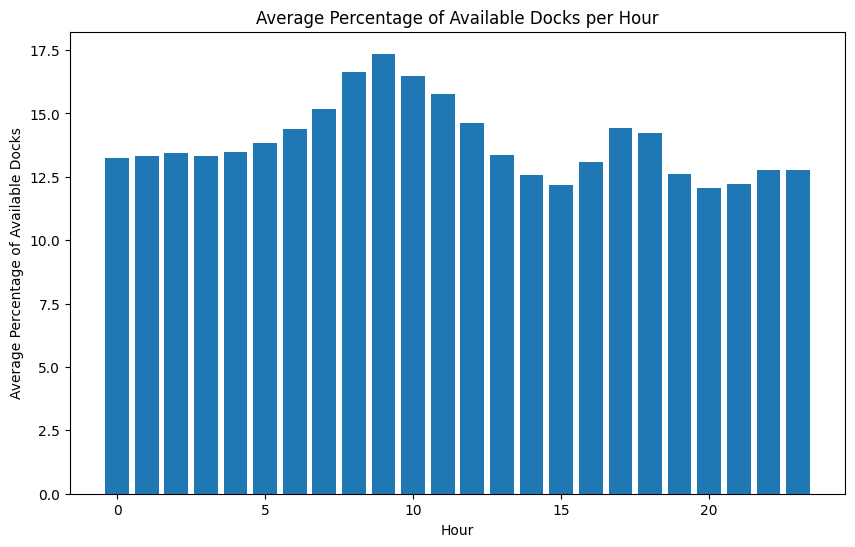

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
try:
    data
except NameError:
    data = pd.read_csv('../data/2023-07-25.csv')

# Convert the 'TimeStamp' column to a datetime data type
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Extract the hour from the 'TimeStamp' column
data['Hour'] = data['TimeStamp'].dt.hour

# Calculate the total capacity for each timestamp
data['TotalCapacity'] = data['BikesDisabled'] + data['EBikesAvailable'] + data['BikesAvailable'] + data['DocksDisabled'] + data['DocksAvailable']

# Calculate the percentage of available docks for each timestamp
data['PercentageAvailable'] = (data['DocksAvailable'] / data['TotalCapacity']) * 100

# Group by the 'Hour' column and calculate the average percentage of available docks
grouped_data = data.groupby('Hour')['PercentageAvailable'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Hour')
plt.ylabel('Average Percentage of Available Docks')
plt.title('Average Percentage of Available Docks per Hour')
plt.show()

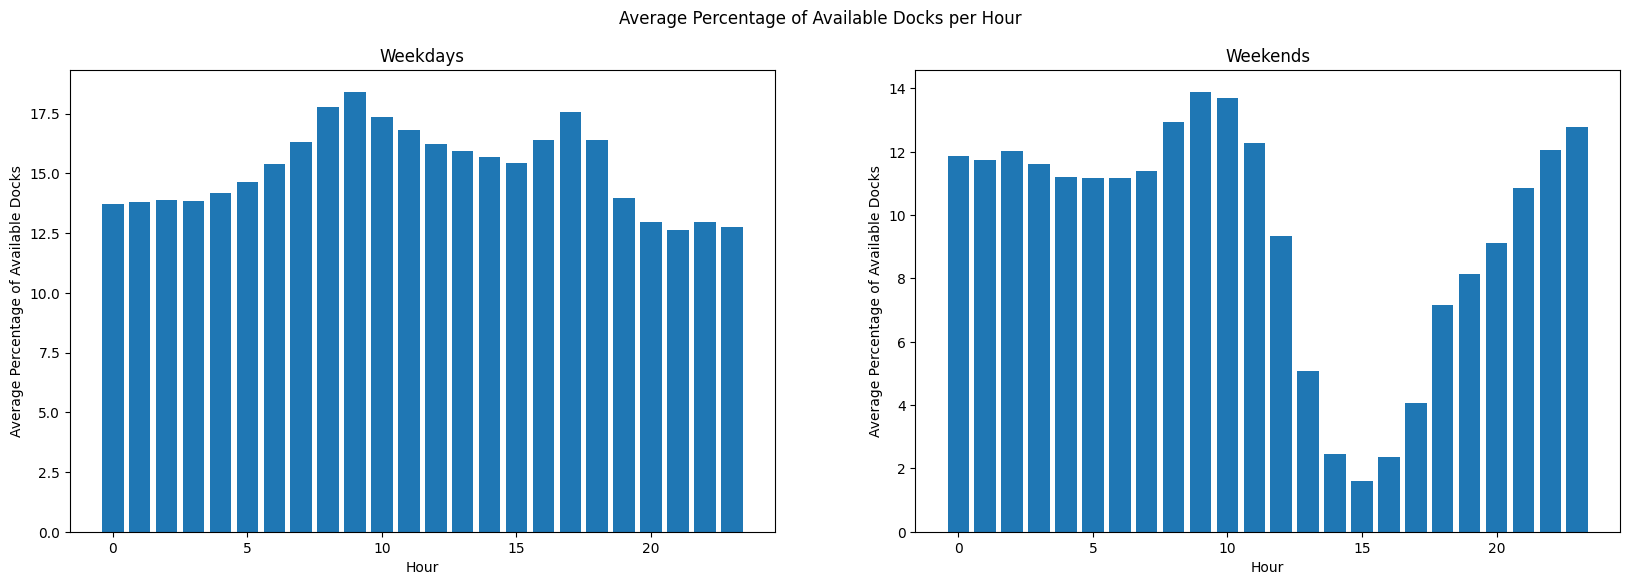

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
try:
    data
except NameError:
    data = pd.read_csv('../data/2023-07-25.csv')

# Convert the 'TimeStamp' column to a datetime data type
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Extract the day of the week from the 'TimeStamp' column
data['DayOfWeek'] = data['TimeStamp'].dt.dayofweek

# Define weekdays as 0-4 and weekend as 5-6
data['IsWeekday'] = data['DayOfWeek'].apply(lambda x: x < 5)

# Extract the hour from the 'TimeStamp' column
data['Hour'] = data['TimeStamp'].dt.hour

# Calculate the total capacity for each timestamp
data['TotalCapacity'] = data['BikesDisabled'] + data['EBikesAvailable'] + data['BikesAvailable'] + data['DocksDisabled'] + data['DocksAvailable']

# Calculate the percentage of available docks for each timestamp
data['PercentageAvailable'] = (data['DocksAvailable'] / data['TotalCapacity']) * 100

# Separate data for weekdays and weekends
weekday_data = data[data['IsWeekday']].groupby('Hour')['PercentageAvailable'].mean()
weekend_data = data[~data['IsWeekday']].groupby('Hour')['PercentageAvailable'].mean()

# Create a figure with 2 subplots: one for weekdays and one for weekends
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Weekday bar chart
ax1.bar(weekday_data.index, weekday_data.values)
ax1.set_xlabel('Hour')
ax1.set_ylabel('Average Percentage of Available Docks')
ax1.set_title('Weekdays')

# Weekend bar chart
ax2.bar(weekend_data.index, weekend_data.values)
ax2.set_xlabel('Hour')
ax2.set_ylabel('Average Percentage of Available Docks')
ax2.set_title('Weekends')

plt.suptitle('Average Percentage of Available Docks per Hour')
plt.show()


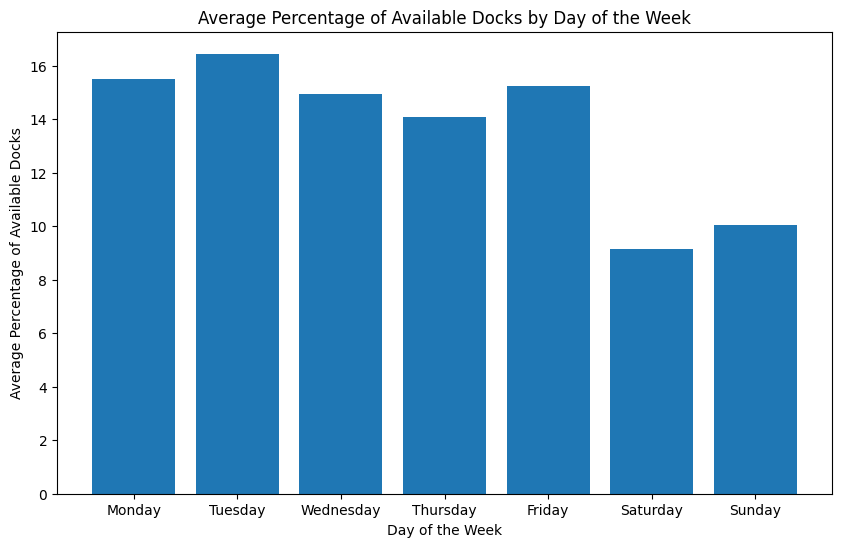

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
try:
    data
except NameError:
    data = pd.read_csv('../data/2023-07-25.csv')

# Convert the 'TimeStamp' column to a datetime data type
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Extract the day of the week from the 'TimeStamp' column
data['DayOfWeek'] = data['TimeStamp'].dt.day_name()

# Calculate the total capacity for each timestamp
data['TotalCapacity'] = data['BikesDisabled'] + data['EBikesAvailable'] + data['BikesAvailable'] + data['DocksDisabled'] + data['DocksAvailable']

# Calculate the percentage of available docks for each timestamp
data['PercentageAvailable'] = (data['DocksAvailable'] / data['TotalCapacity']) * 100

# Group by the 'DayOfWeek' column and calculate the average percentage of available docks
average_percentage_available = data.groupby('DayOfWeek')['PercentageAvailable'].mean()

# Order of the days in the week for the plot
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex to make sure the days are ordered correctly
average_percentage_available = average_percentage_available.reindex(days_order)

# Create the bar chart
plt.figure(figsize=(10,6))
plt.bar(average_percentage_available.index, average_percentage_available.values)
plt.xlabel('Day of the Week')
plt.ylabel('Average Percentage of Available Docks')
plt.title('Average Percentage of Available Docks by Day of the Week')
plt.show()

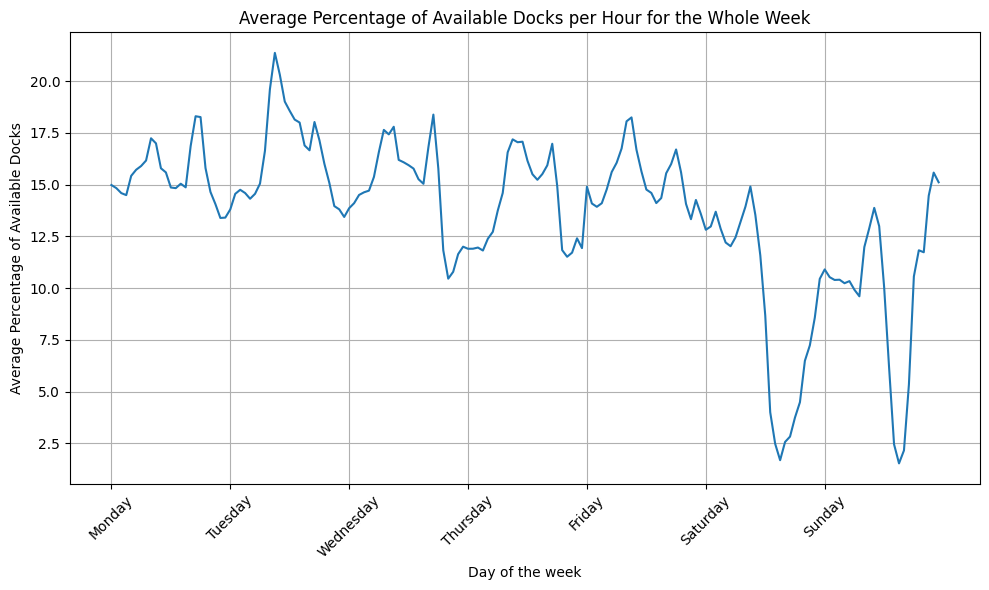

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
try:
    data
except NameError:
    data = pd.read_csv('../data/2023-07-25.csv')

# Convert the 'TimeStamp' column to a datetime data type
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Extract the day of the week and the hour from the 'TimeStamp' column
data['DayOfWeek'] = data['TimeStamp'].dt.dayofweek  # Monday=0, Sunday=6
data['Hour'] = data['TimeStamp'].dt.hour

# Calculate the total capacity for each timestamp
data['TotalCapacity'] = data['BikesDisabled'] + data['EBikesAvailable'] + data['BikesAvailable'] + data['DocksDisabled'] + data['DocksAvailable']

# Calculate the percentage of available docks for each timestamp
data['PercentageAvailable'] = (data['DocksAvailable'] / data['TotalCapacity']) * 100

# Create a new column 'HoursSinceStartOfWeek' where Monday 00:00 corresponds to 0
data['HoursSinceStartOfWeek'] = data['DayOfWeek'] * 24 + data['Hour']

# Group by the 'HoursSinceStartOfWeek' and calculate the average percentage of available docks
grouped_data = data.groupby('HoursSinceStartOfWeek')['PercentageAvailable'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data.values, label='Average Percentage of Available Docks')

# Set the xticks to represent the days of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(np.arange(0, 7*24, 24), days, rotation=45)

plt.xlabel('Day of the week')
plt.ylabel('Average Percentage of Available Docks')
plt.title('Average Percentage of Available Docks per Hour for the Whole Week')
plt.grid(True)
plt.tight_layout()
plt.show()

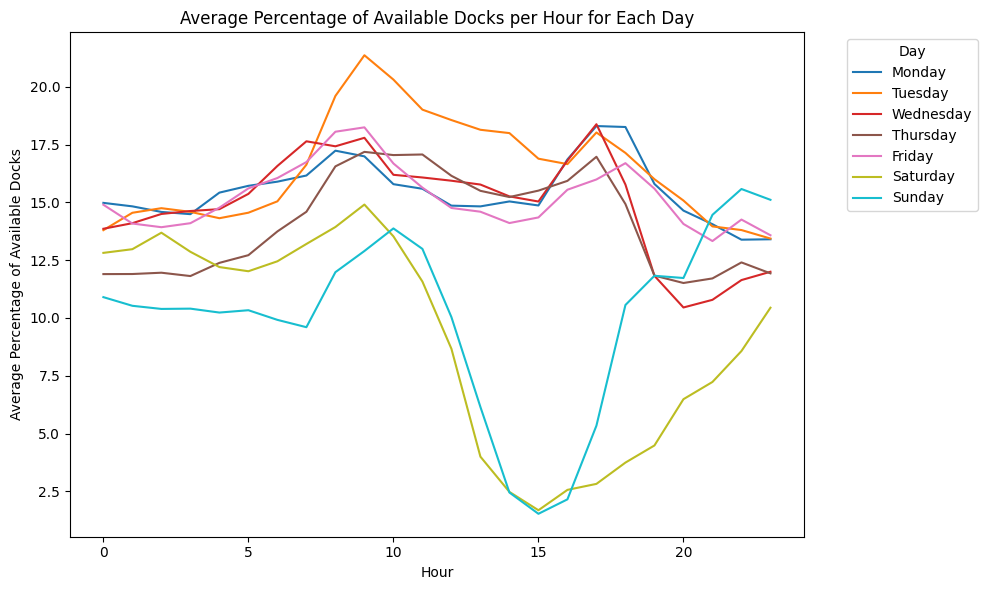

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
try:
    data
except NameError:
    data = pd.read_csv('../data/2023-07-25.csv')

# Convert the 'TimeStamp' column to a datetime data type
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Extract the weekday and the hour from the 'TimeStamp' column
data['Day'] = data['TimeStamp'].dt.day_name()
data['Hour'] = data['TimeStamp'].dt.hour

# Calculate the total capacity for each timestamp
data['TotalCapacity'] = data['BikesDisabled'] + data['EBikesAvailable'] + data['BikesAvailable'] + data['DocksDisabled'] + data['DocksAvailable']

# Calculate the percentage of available docks for each timestamp
data['PercentageAvailable'] = (data['DocksAvailable'] / data['TotalCapacity']) * 100

# Group by the 'Day' and 'Hour' columns and calculate the average percentage of available docks
grouped_data = data.groupby(['Day', 'Hour'])['PercentageAvailable'].mean()

# Order of the days in the week for the plot
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a line plot for each day
plt.figure(figsize=(10, 6))
cmap = plt.get_cmap('tab10', len(days_order))

for i, day in enumerate(days_order):
    if day in grouped_data.index:
        day_data = grouped_data.loc[day]
        plt.plot(day_data.index, day_data.values, color=cmap(i), label=day)

plt.xlabel('Hour')
plt.ylabel('Average Percentage of Available Docks')
plt.title('Average Percentage of Available Docks per Hour for Each Day')
plt.legend(title='Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

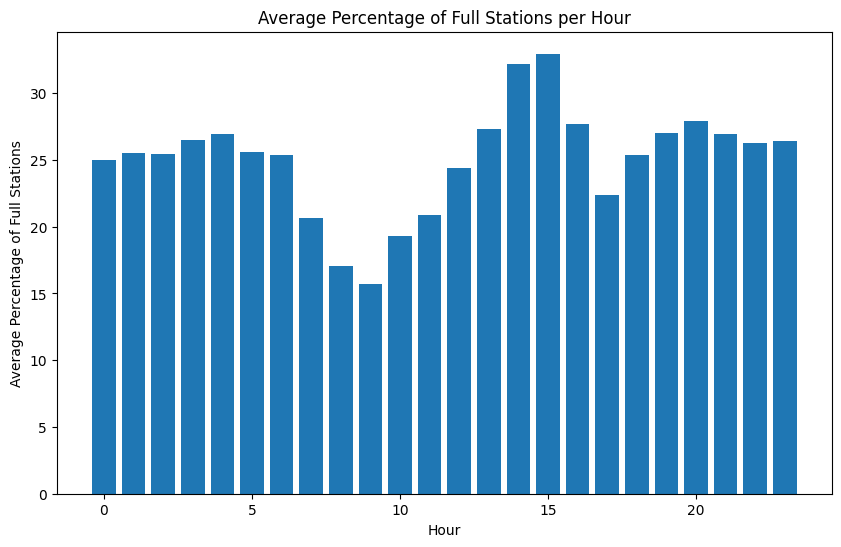

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
try:
    data
except NameError:
    data = pd.read_csv('../data/2023-07-25.csv')

# Convert the 'TimeStamp' column to a datetime data type
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Extract the hour from the 'TimeStamp' column
data['Hour'] = data['TimeStamp'].dt.hour

data['ZeroDocks'] = (data['DocksAvailable'] == 0).astype(int)
data['NumberOfStations'] = 1

grouped_data = data.groupby('Hour').agg({
    'ZeroDocks': 'sum', 
    'NumberOfStations': 'sum', 
    'TimeStamp': 'nunique'
})


# Calculate the percentage of full stations per hour
grouped_data['PercentageFullStations'] = (grouped_data['ZeroDocks'] / grouped_data['NumberOfStations']) * 100

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data['PercentageFullStations'])
plt.xlabel('Hour')
plt.ylabel('Average Percentage of Full Stations')
plt.title('Average Percentage of Full Stations per Hour')
plt.show()

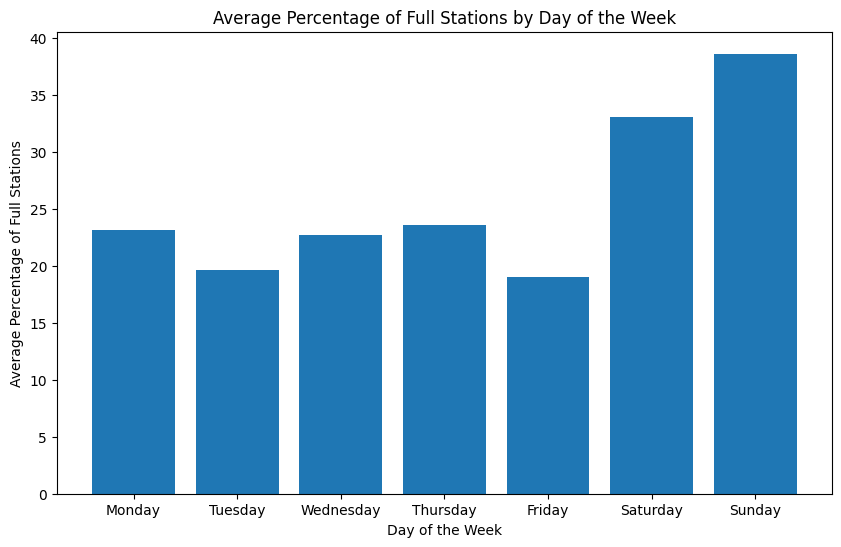

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
try:
    data
except NameError:
    data = pd.read_csv('../data/2023-07-25.csv')

# Convert the 'TimeStamp' column to a datetime data type
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Extract the day of the week from the 'TimeStamp' column
data['DayOfWeek'] = data['TimeStamp'].dt.day_name()

# Determine whether each station is full (i.e., no docks are available)
data['FullStation'] = (data['DocksAvailable'] == 0).astype(int)

# Calculate the total number of stations
data['NumberOfStations'] = 1

# Group by the 'DayOfWeek' column
grouped_data = data.groupby('DayOfWeek').agg({
    'FullStation': 'sum', 
    'NumberOfStations': 'sum', 
})

# Calculate the percentage of full stations per day
grouped_data['PercentageFullStations'] = (grouped_data['FullStation'] / grouped_data['NumberOfStations']) * 100

# Order of the days in the week for the plot
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex to make sure the days are ordered correctly
grouped_data = grouped_data.reindex(days_order)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data['PercentageFullStations'])
plt.xlabel('Day of the Week')
plt.ylabel('Average Percentage of Full Stations')
plt.title('Average Percentage of Full Stations by Day of the Week')
plt.show()

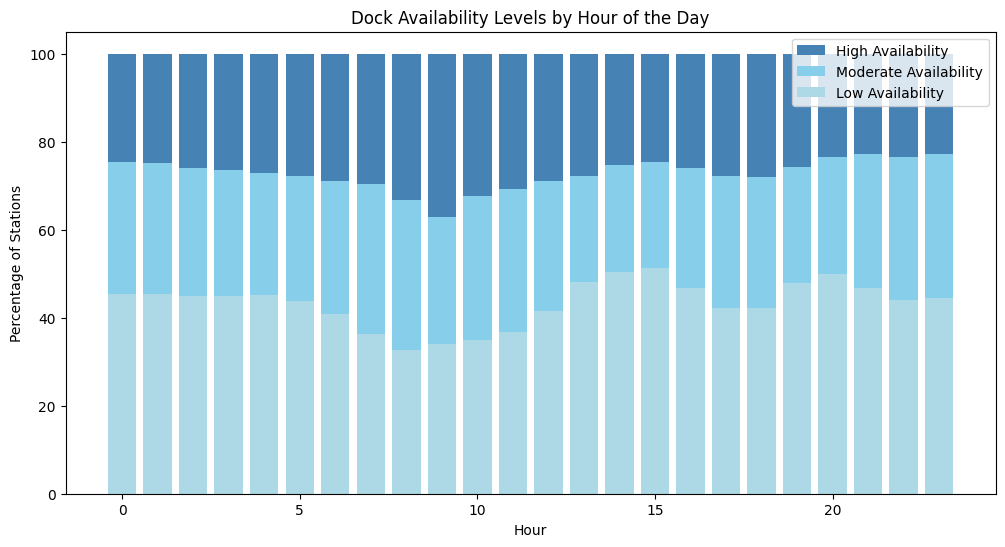

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
try:
    data
except NameError:
    data = pd.read_csv('../data/2023-07-25.csv')

# Convert the 'TimeStamp' column to a datetime data type
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Extract the hour from the 'TimeStamp' column
data['Hour'] = data['TimeStamp'].dt.hour

data['LowAvailability'] = (data['DocksAvailable'] < 2).astype(int)
data['ModerateAvailability'] = ((data['DocksAvailable'] >= 2) & (data['DocksAvailable'] < 5)).astype(int)
data['HighAvailability'] = (data['DocksAvailable'] >= 5).astype(int)

# Calculate the total number of stations
data['NumberOfStations'] = 1

# Group by the 'Hour' column
grouped_data = data.groupby('Hour').agg({
    'LowAvailability': 'sum',
    'ModerateAvailability': 'sum',
    'HighAvailability': 'sum',
    'NumberOfStations': 'sum',
})

# Calculate the percentage of stations for each availability level per hour
grouped_data['PercentageLowAvailability'] = (grouped_data['LowAvailability'] / grouped_data['NumberOfStations']) * 100
grouped_data['PercentageModerateAvailability'] = (grouped_data['ModerateAvailability'] / grouped_data['NumberOfStations']) * 100
grouped_data['PercentageHighAvailability'] = (grouped_data['HighAvailability'] / grouped_data['NumberOfStations']) * 100

# Create a bar chart
plt.figure(figsize=(12, 6))

bar1 = plt.bar(grouped_data.index, grouped_data['PercentageHighAvailability'], bottom=grouped_data['PercentageLowAvailability'] + grouped_data['PercentageModerateAvailability'], color='steelblue', label='High Availability')
bar2 = plt.bar(grouped_data.index, grouped_data['PercentageModerateAvailability'], bottom=grouped_data['PercentageLowAvailability'], color='skyblue', label='Moderate Availability')
bar3 = plt.bar(grouped_data.index, grouped_data['PercentageLowAvailability'], color='lightblue', label='Low Availability')

plt.xlabel('Hour')
plt.ylabel('Percentage of Stations')
plt.title('Dock Availability Levels by Hour of the Day')

# Place the legend at the top right corner
plt.legend(loc='upper right')

plt.show()

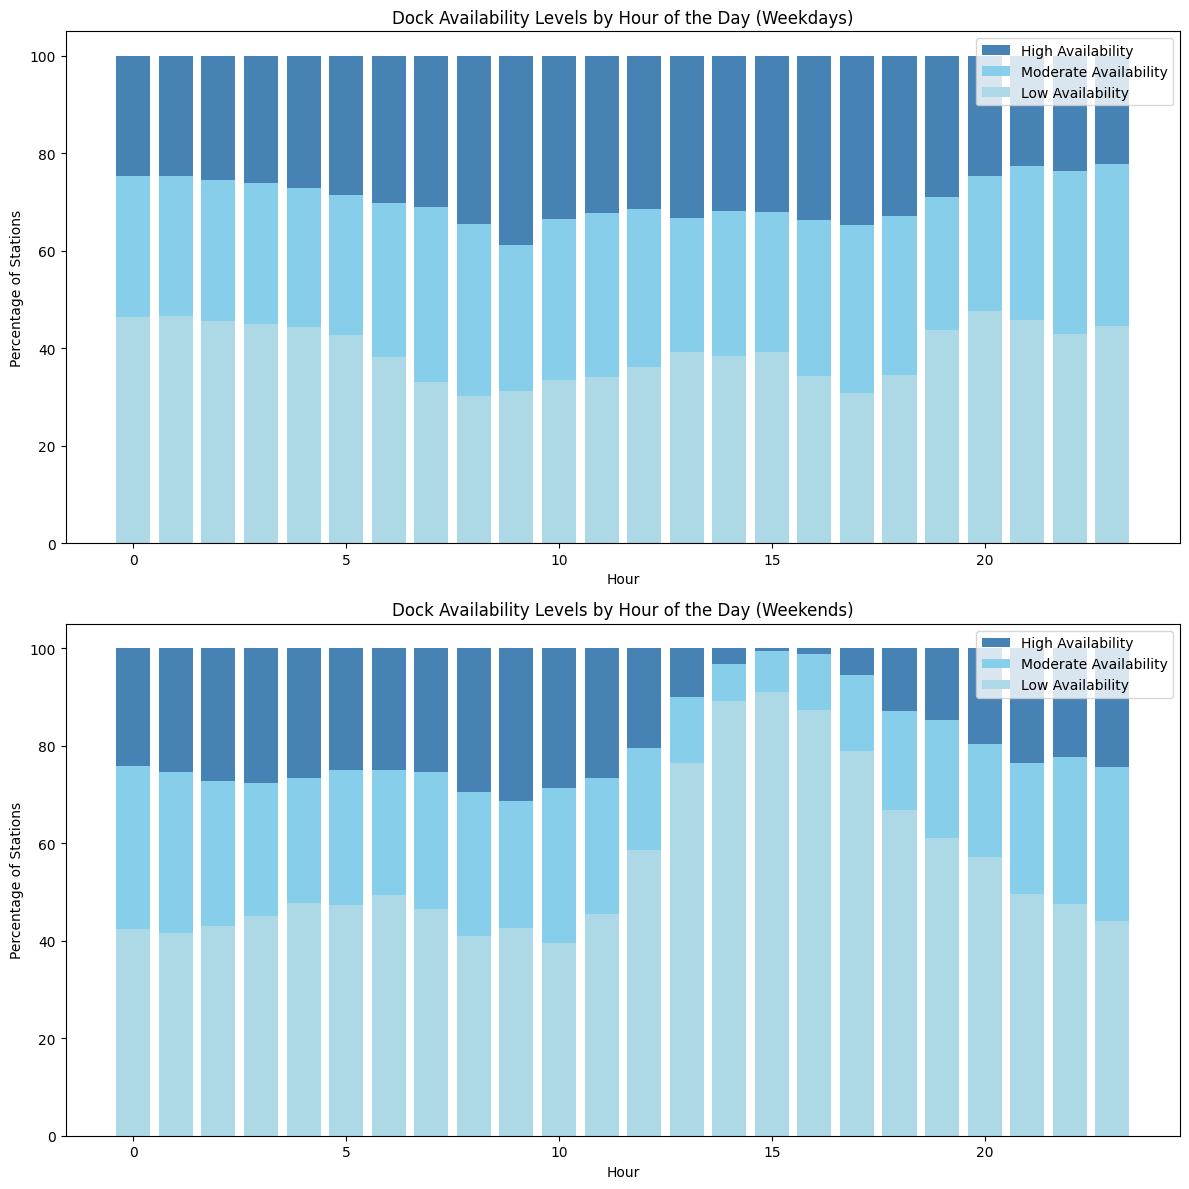

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
try:
    data
except NameError:
    data = pd.read_csv('../data/2023-07-25.csv')

# Convert the 'TimeStamp' column to a datetime data type
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Extract the hour and day of the week from the 'TimeStamp' column
data['Hour'] = data['TimeStamp'].dt.hour
data['DayOfWeek'] = data['TimeStamp'].dt.dayofweek  # Monday=0, Sunday=6

# Split the data into weekdays and weekends
data_weekdays = data[data['DayOfWeek'] < 5]
data_weekends = data[data['DayOfWeek'] >= 5]

# Define a function for calculating availability levels and plotting
def plot_availability(data, title, subplot_index):
    data_copy = data.copy()
    data_copy.loc[:, 'LowAvailability'] = (data_copy['DocksAvailable'] < 2).astype(int)
    data_copy.loc[:, 'ModerateAvailability'] = ((data_copy['DocksAvailable'] >= 2) & (data_copy['DocksAvailable'] < 5)).astype(int)
    data_copy.loc[:, 'HighAvailability'] = (data_copy['DocksAvailable'] >= 5).astype(int)
    data_copy.loc[:, 'NumberOfStations'] = 1

    grouped_data = data_copy.groupby('Hour').agg({
        'LowAvailability': 'sum',
        'ModerateAvailability': 'sum',
        'HighAvailability': 'sum',
        'NumberOfStations': 'sum',
    })

    grouped_data['PercentageLowAvailability'] = (grouped_data['LowAvailability'] / grouped_data['NumberOfStations']) * 100
    grouped_data['PercentageModerateAvailability'] = (grouped_data['ModerateAvailability'] / grouped_data['NumberOfStations']) * 100
    grouped_data['PercentageHighAvailability'] = (grouped_data['HighAvailability'] / grouped_data['NumberOfStations']) * 100

    ax = plt.subplot(2, 1, subplot_index)
    bar1 = ax.bar(grouped_data.index, grouped_data['PercentageHighAvailability'], bottom=grouped_data['PercentageLowAvailability'] + grouped_data['PercentageModerateAvailability'], color='steelblue', label='High Availability')
    bar2 = ax.bar(grouped_data.index, grouped_data['PercentageModerateAvailability'], bottom=grouped_data['PercentageLowAvailability'], color='skyblue', label='Moderate Availability')
    bar3 = ax.bar(grouped_data.index, grouped_data['PercentageLowAvailability'], color='lightblue', label='Low Availability')

    plt.xlabel('Hour')
    plt.ylabel('Percentage of Stations')
    plt.title(title)

    plt.legend(loc='upper right')

# Create a figure
plt.figure(figsize=(12, 12))

# Plot the data for weekdays and weekends
plot_availability(data_weekdays, 'Dock Availability Levels by Hour of the Day (Weekdays)', 1)
plot_availability(data_weekends, 'Dock Availability Levels by Hour of the Day (Weekends)', 2)

plt.tight_layout()
plt.show()

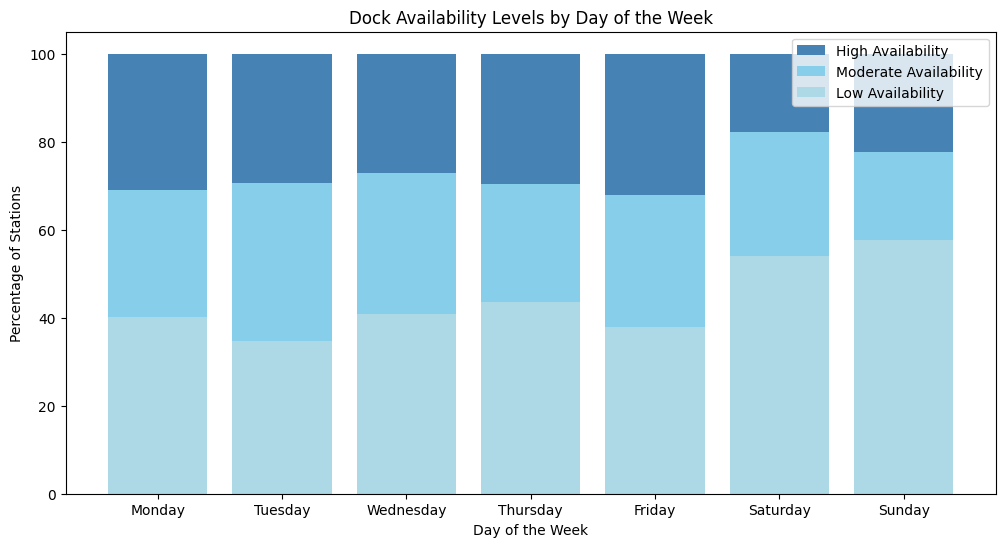

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
try:
    data
except NameError:
    data = pd.read_csv('../data/2023-07-25.csv')

# Convert the 'TimeStamp' column to a datetime data type
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Extract the day of the week from the 'TimeStamp' column
data['DayOfWeek'] = data['TimeStamp'].dt.day_name()

data['LowAvailability'] = (data['DocksAvailable'] < 2).astype(int)
data['ModerateAvailability'] = ((data['DocksAvailable'] >= 2) & (data['DocksAvailable'] < 5)).astype(int)
data['HighAvailability'] = (data['DocksAvailable'] >= 5).astype(int)

# Calculate the total number of stations
data['NumberOfStations'] = 1

# Group by the 'DayOfWeek' column
grouped_data = data.groupby('DayOfWeek').agg({
    'LowAvailability': 'sum',
    'ModerateAvailability': 'sum',
    'HighAvailability': 'sum',
    'NumberOfStations': 'sum',
})

# Calculate the percentage of stations for each availability level per day
grouped_data['PercentageLowAvailability'] = (grouped_data['LowAvailability'] / grouped_data['NumberOfStations']) * 100
grouped_data['PercentageModerateAvailability'] = (grouped_data['ModerateAvailability'] / grouped_data['NumberOfStations']) * 100
grouped_data['PercentageHighAvailability'] = (grouped_data['HighAvailability'] / grouped_data['NumberOfStations']) * 100

# Order of the days in the week for the plot
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex to make sure the days are ordered correctly
grouped_data = grouped_data.reindex(days_order)

# Create a bar chart
plt.figure(figsize=(12, 6))

bar1 = plt.bar(grouped_data.index, grouped_data['PercentageHighAvailability'], bottom=grouped_data['PercentageLowAvailability'] + grouped_data['PercentageModerateAvailability'], color='steelblue', label='High Availability')
bar2 = plt.bar(grouped_data.index, grouped_data['PercentageModerateAvailability'], bottom=grouped_data['PercentageLowAvailability'], color='skyblue', label='Moderate Availability')
bar3 = plt.bar(grouped_data.index, grouped_data['PercentageLowAvailability'], color='lightblue', label='Low Availability')

plt.xlabel('Day of the Week')
plt.ylabel('Percentage of Stations')
plt.title('Dock Availability Levels by Day of the Week')

# Place the legend at the top right corner
plt.legend(loc='upper right')

plt.show()

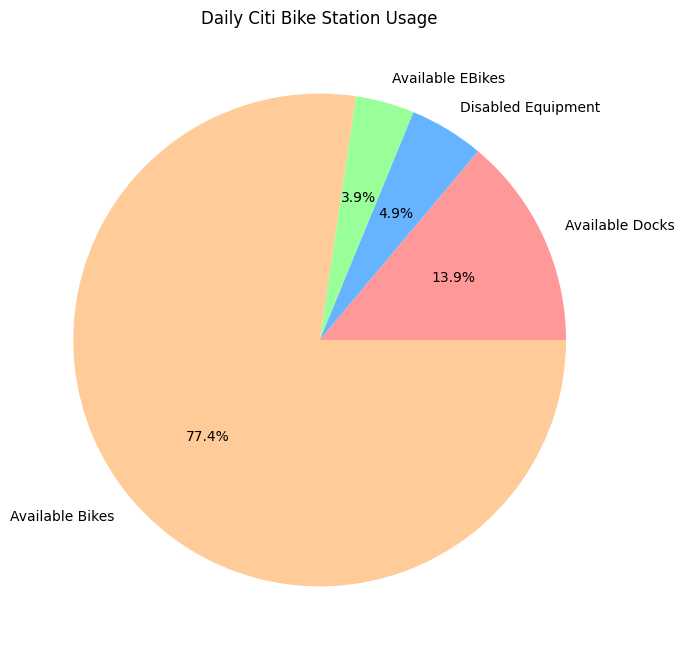

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
try:
    data
except NameError:
    data = pd.read_csv('../data/2023-07-25.csv')

# Calculate the total capacity for each timestamp
data['TotalCapacity'] = data['BikesDisabled'] + data['EBikesAvailable'] + data['BikesAvailable'] + data['DocksDisabled'] + data['DocksAvailable']

# Calculate the percentage of available docks for each timestamp
data['PercentageAvailable'] = (data['DocksAvailable'] / data['TotalCapacity']) * 100

# Calculate the average percentage of available docks
average_percentage_available = data['PercentageAvailable'].mean()

# Calculate the average percentage of each category
average_percentage_disabled = (data['DocksDisabled'].sum() + data['BikesDisabled'].sum()) / data['TotalCapacity'].sum() * 100
average_percentage_ebikes_available = (data['EBikesAvailable'].sum() / data['TotalCapacity'].sum()) * 100
average_percentage_bikes_available = (data['BikesAvailable'].sum() / data['TotalCapacity'].sum()) * 100

# Define the data for the pie chart
sizes = [average_percentage_available, average_percentage_disabled, average_percentage_ebikes_available, average_percentage_bikes_available]
labels = ['Available Docks', 'Disabled Equipment', 'Available EBikes', 'Available Bikes']
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
# colors = ['DarkOrange', 'SeaGreen', 'RoyalBlue', 'SlateGray']
# colors = ['steelblue', 'skyblue', 'lightblue', 'paleturquoise']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Daily Citi Bike Station Usage')
plt.show()

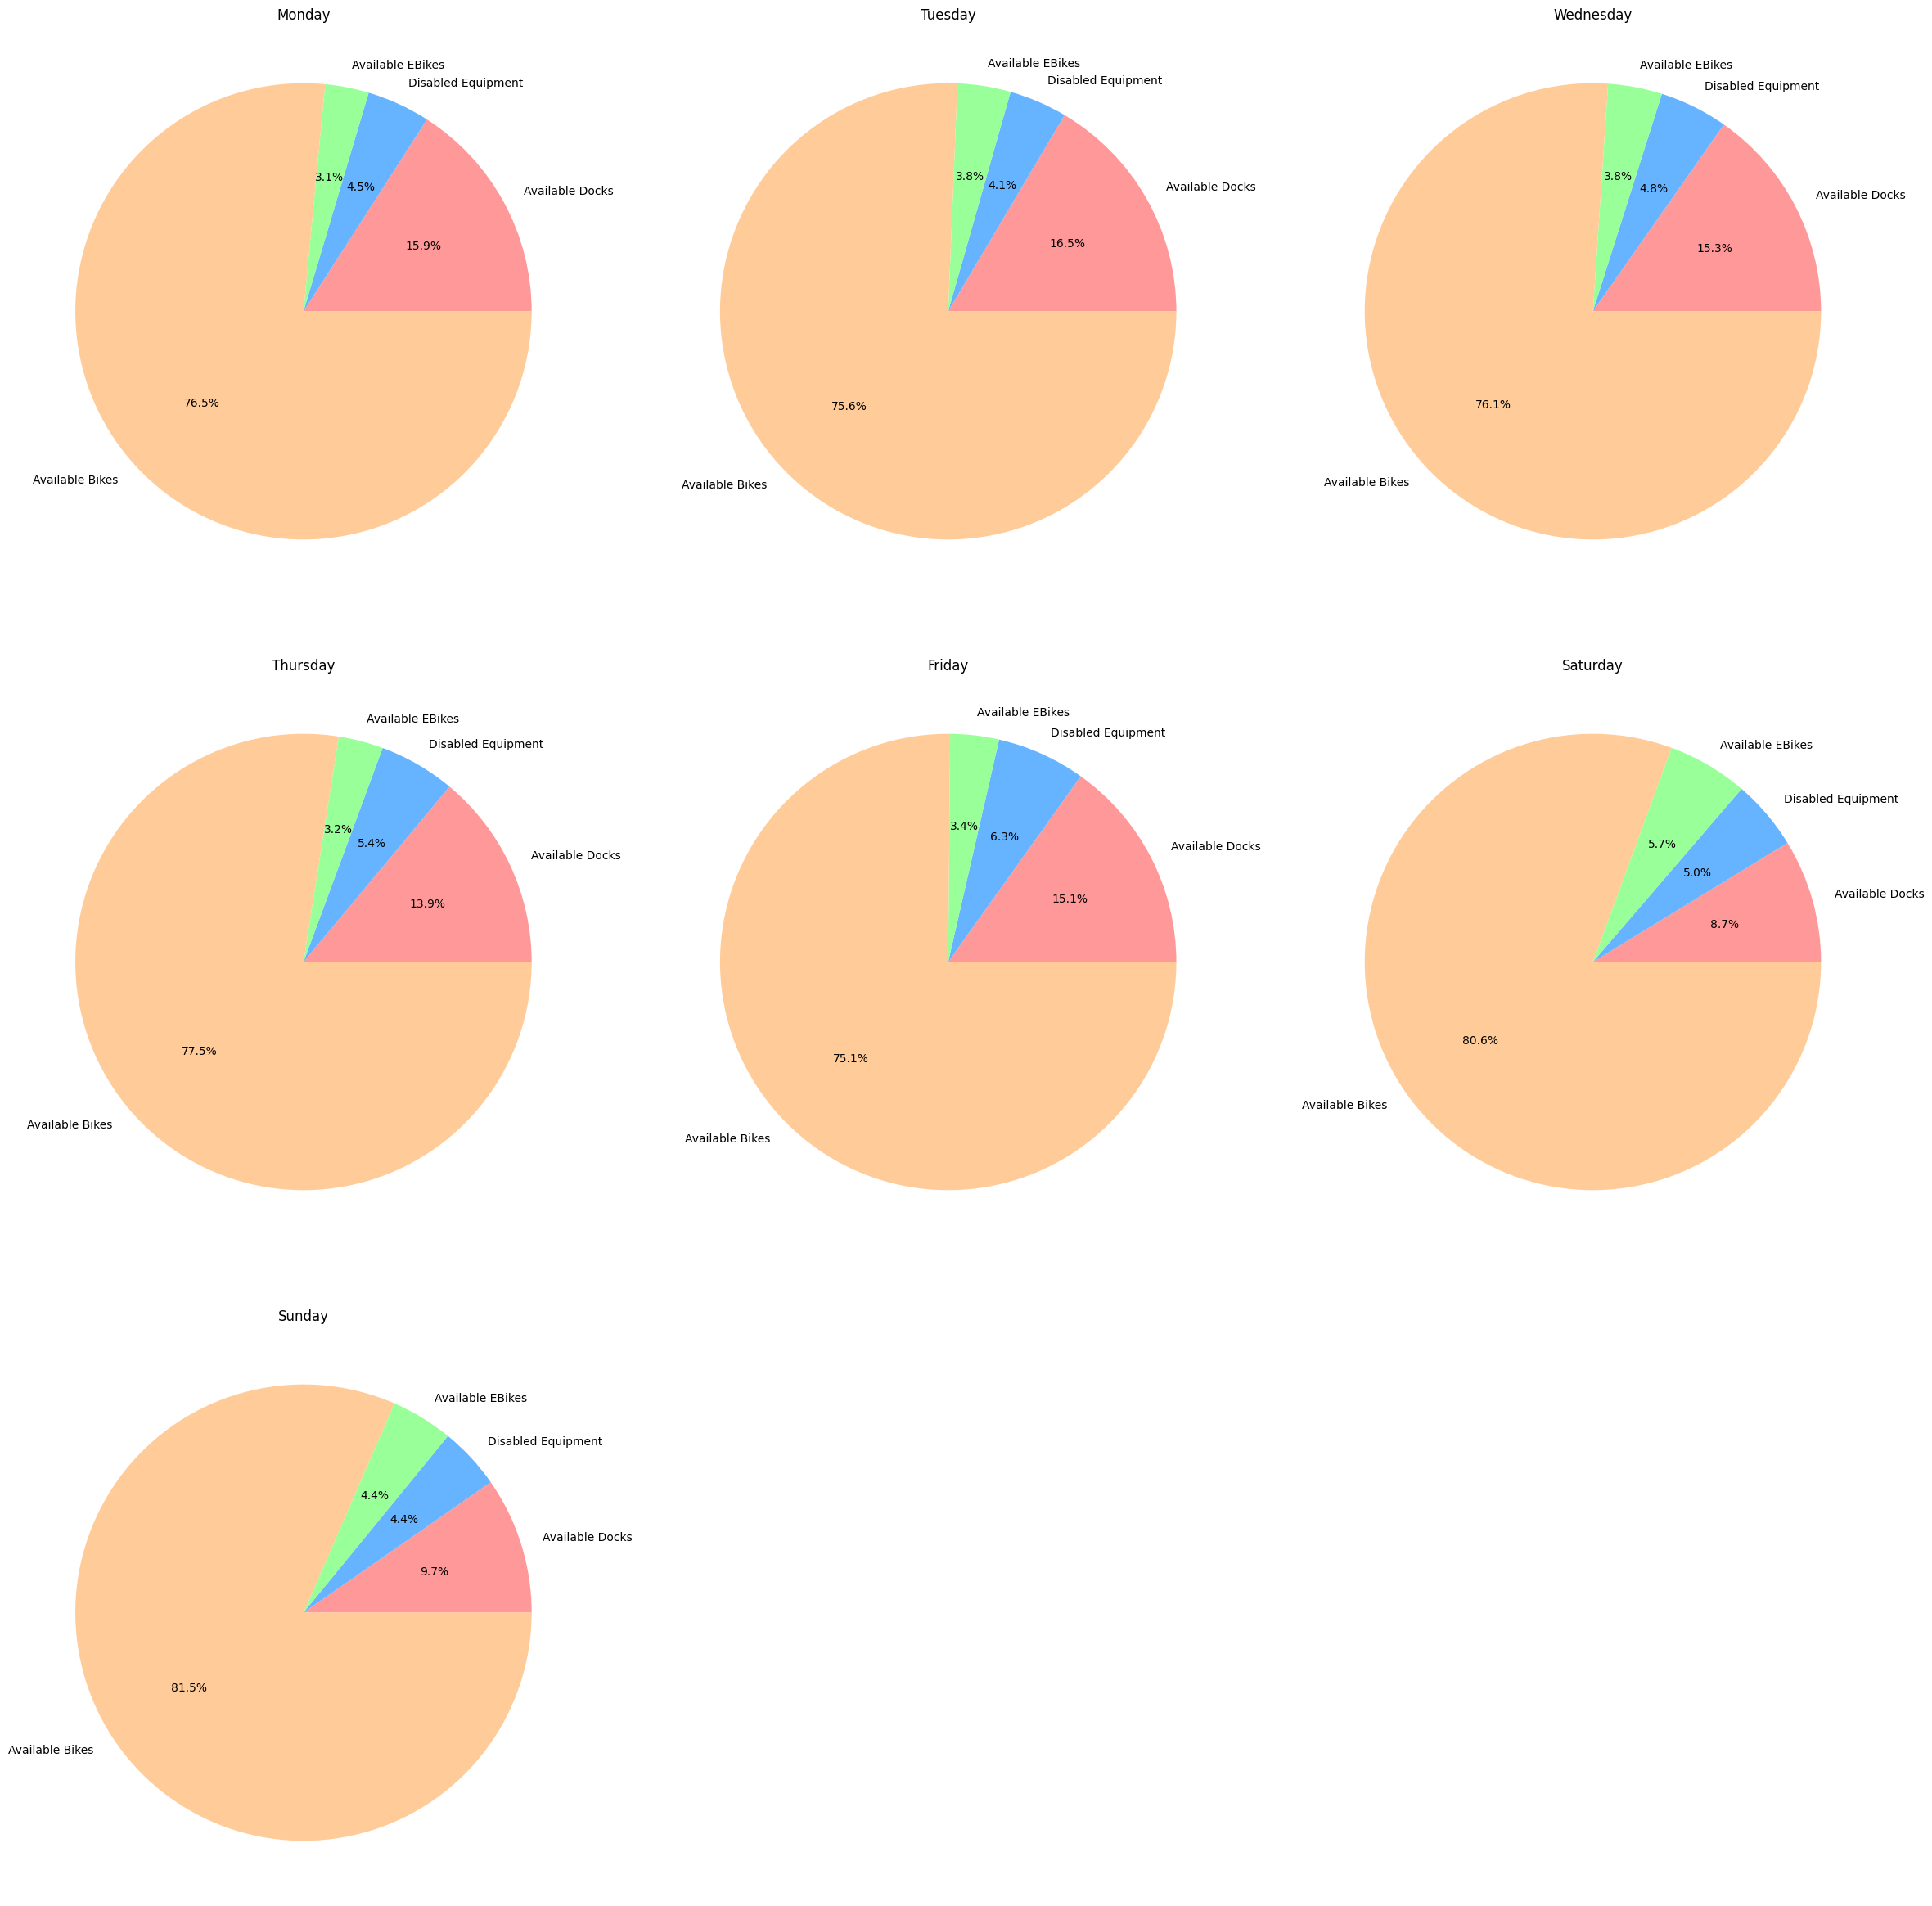

In [30]:
# Load the data
try:
    data
except NameError:
    data = pd.read_csv('../data/2023-07-25.csv')

# Convert the 'TimeStamp' column to a datetime data type
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Extract the day of the week from the 'TimeStamp' column
data['DayOfWeek'] = data['TimeStamp'].dt.day_name()

# Group the data by day of the week
grouped_data = data.groupby('DayOfWeek')

# Get the list of unique days to set up the subplots
unique_days = data['DayOfWeek'].unique()
unique_days = sorted(unique_days, key=lambda x: ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'].index(x)) # Sort days

# Determine the number of rows for the subplots
rows = len(unique_days) // 3 if len(unique_days) % 3 == 0 else len(unique_days) // 3 + 1

# Create the subplots
fig, axs = plt.subplots(rows, 3, figsize=(24, 8*rows))
axs = axs.ravel() # Flatten the array to easily iterate over it

for i, day in enumerate(unique_days):
    group = grouped_data.get_group(day).copy()  # make a copy of the group

    # Calculate the total capacity for each timestamp
    group['TotalCapacity'] = group['BikesDisabled'] + group['EBikesAvailable'] + group['BikesAvailable'] + group['DocksDisabled'] + group['DocksAvailable']

    # Calculate the average percentage of each category
    average_percentage_disabled = (group['DocksDisabled'].sum() + group['BikesDisabled'].sum()) / group['TotalCapacity'].sum() * 100
    average_percentage_ebikes_available = (group['EBikesAvailable'].sum() / group['TotalCapacity'].sum()) * 100
    average_percentage_bikes_available = (group['BikesAvailable'].sum() / group['TotalCapacity'].sum()) * 100
    average_percentage_docks_available = (group['DocksAvailable'].sum() / group['TotalCapacity'].sum()) * 100

    # Define the data for the pie chart
    sizes = [average_percentage_docks_available, average_percentage_disabled, average_percentage_ebikes_available, average_percentage_bikes_available]
    labels = ['Available Docks', 'Disabled Equipment', 'Available EBikes', 'Available Bikes']
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
#     colors = ['steelblue', 'skyblue', 'lightblue', 'paleturquoise']

    # Create a pie chart
    axs[i].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
    axs[i].set_title(f'{day}')

# If there are less than 3 charts in the last row, remove the extra subplots
if len(unique_days) % 3 != 0:
    for i in range(len(unique_days), rows*3):
        fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

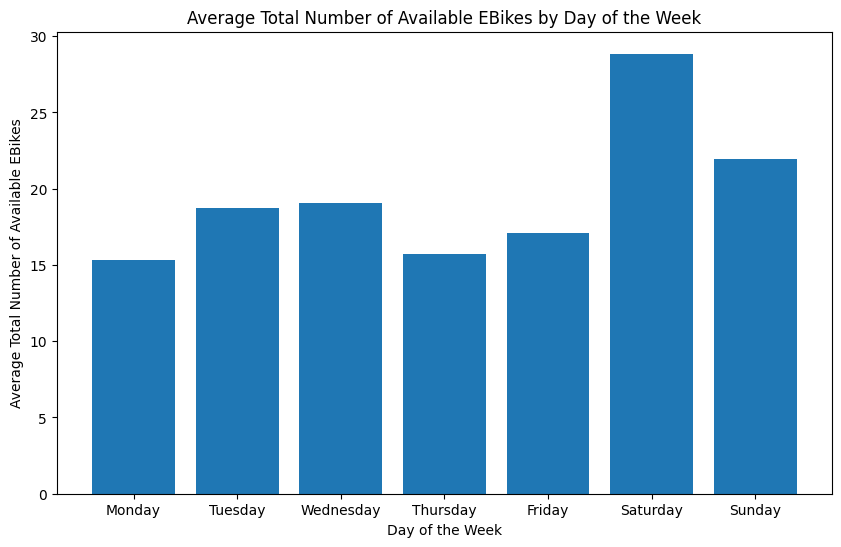

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
try:
    data
except NameError:
    data = pd.read_csv('../data/2023-07-25.csv')

# Convert the 'TimeStamp' column to a datetime data type
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

# Extract the day of the week from the 'TimeStamp' column
data['DayOfWeek'] = data['TimeStamp'].dt.day_name()

# Group by the 'DayOfWeek' and 'TimeStamp' columns and calculate the total number of available EBikes at each timestamp
total_EBikes_available = data.groupby(['DayOfWeek', 'TimeStamp'])['EBikesAvailable'].sum().reset_index()

# Group by the 'DayOfWeek' column again and calculate the average total number of available EBikes for each day of the week
average_total_EBikes_available = total_EBikes_available.groupby('DayOfWeek')['EBikesAvailable'].mean()

# Order of the days in the week for the plot
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex to make sure the days are ordered correctly
average_total_EBikes_available = average_total_EBikes_available.reindex(days_order)

# Create the bar chart
plt.figure(figsize=(10,6))
plt.bar(average_total_EBikes_available.index, average_total_EBikes_available.values)
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Number of Available EBikes')
plt.title('Average Total Number of Available EBikes by Day of the Week')
plt.show()

In [32]:
import json
import pandas as pd
import folium
import numpy as np
from folium.plugins import HeatMap
from pandas import json_normalize
from matplotlib import pyplot as plt
from scipy.stats import zscore
from shapely.geometry import Point
import geopandas as gpd

# Load the data
try:
    data
except NameError:
    data = pd.read_csv('../data/2023-07-25.csv')

# Load the station information
with open('../data/station_info.json', 'r') as f:
    station_info = json.load(f)

stations = station_info['stations']  # Extract station data

# Convert station data to a dataframe
stations_df = pd.json_normalize(stations)  # Flatten JSON into a dataframe

# Merge the data with station information to get latitude and longitude
merged_data = pd.merge(data, stations_df, how="left", left_on="Name", right_on="name")  

# Calculate the total number of usable docks for each timestamp
merged_data['UsableDocks'] = merged_data['DocksAvailable'] - merged_data['DocksDisabled']

# Group by the 'Name' column and calculate the average number of usable docks
grouped_data = merged_data.groupby('Name')[['UsableDocks', 'longitude', 'latitude']].mean()

grouped_data = grouped_data.sort_values(by='UsableDocks')

# Define color assignment function
def assign_color(value):
    if value < 2:
        return 'red'
    elif 2 <= value < 5:
        return 'orange'
    else:
        return 'green'

# Create a new column 'Color' based on 'UsableDocks' values
grouped_data['Color'] = grouped_data['UsableDocks'].apply(assign_color)

# Convert latitude and longitude to geometric points
geometry = [Point(xy) for xy in zip(grouped_data['longitude'], grouped_data['latitude'])]

# Create a GeoDataFrame
geo_df = gpd.GeoDataFrame(grouped_data, geometry=geometry)

# Create a Folium map centered on the mean of latitude and longitude
m = folium.Map(location=[grouped_data['latitude'].mean(), grouped_data['longitude'].mean()],
               zoom_start=15, tiles='CartoDB Positron')

# Add data to map
for idx, row in geo_df.iterrows():
    folium.CircleMarker(location=(row['latitude'], row['longitude']),
                        radius=7,
                        fill=True,
                        fill_opacity=0.7,
                        color=row['Color'],
                        fill_color=row['Color']).add_to(m)

m.save('heatmap.html')

grouped_data_reset = grouped_data.reset_index()
print(grouped_data_reset[['Name', 'UsableDocks']].to_string(index=False))

                      Name  UsableDocks
Commerce St & Van Brunt St     1.466817
      Columbia St & W 9 St     1.650963
         Henry St & Bay St     1.801516
    Wolcott St & Dwight St     1.895330
Sigourney St & Columbia St     1.904752
         Henry St & W 9 St     2.058787
   Dwight St & Van Dyke St     2.310324
         Bay St & Court St     2.350676
    Clinton St & Centre St     2.807456
   Columbia St & Degraw St     3.159975
  Richards St & Delavan St     3.878124
 Pioneer St & Van Brunt St     4.137239
  Pioneer St & Richards St     4.226956
 Van Brunt St & Wolcott St     4.751127
    Coffey St & Conover St     4.783490
  Carroll St & Columbia St     5.260139
Van Brunt St & Van Dyke St     6.152397
 Columbia St & Lorraine St     6.802540
     Coffey St & Ferris St     7.500205
